In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio
from my_functions import get_audio_record_ravdess


sr = 22050
print(f'Time delta: {1/sr} s')

Time delta: 4.5351473922902495e-05 s


In [4]:
df = pd.read_csv('data.csv', delimiter=';', index_col=0)
files = df['File']
samples_length = np.zeros(files.shape[0], dtype=np.int32)
samples = np.empty(files.shape, dtype=pd.DataFrame)

for i, file in enumerate(files):
	audio = get_audio_record_ravdess(file)
	n = len(audio)
	time_range = pd.date_range(start='2024-05-06', periods=n, freq=f'{1e6/sr:.3f}us')

	samples[i] = pd.DataFrame({'Audio': audio}, index=time_range)
	samples_length[i] = n
	

In [3]:
df

,Actor,Sex,Emotion,Intensity,Statement,Reps,File,No. Samples,Duration
0,Actor_01,Man,Neutral,Normal,Kids are talking by the door,1,03-01-01-01-01-01-01.wav,72838,3.303311
1,Actor_01,Man,Neutral,Normal,Kids are talking by the door,2,03-01-01-01-01-02-01.wav,73574,3.336689
2,Actor_01,Man,Neutral,Normal,Dogs are sitting by the door,1,03-01-01-01-02-01-01.wav,72102,3.269932
3,Actor_01,Man,Neutral,Normal,Dogs are sitting by the door,2,03-01-01-01-02-02-01.wav,69895,3.169841
4,Actor_01,Man,Calm,Normal,Kids are talking by the door,1,03-01-02-01-01-01-01.wav,77988,3.536871
...,...,...,...,...,...,...,...,...,...
1435,Actor_24,Woman,Surprised,Normal,Dogs are sitting by the door,2,03-01-08-01-02-02-24.wav,75045,3.403401
1436,Actor_24,Woman,Surprised,Strong,Kids are talking by the door,1,03-01-08-02-01-01-24.wav,86817,3.937279
1437,Actor_24,Woman,Surprised,Strong,Kids are talking by the door,2,03-01-08-02-01-02-24.wav,87553,3.970658
1438,Actor_24,Woman,Surprised,Strong,Dogs are sitting by the door,1,03-01-08-02-02-01-24.wav,80931,3.670340


In [12]:
dur_max = df['Duration'].max()
df[df['Duration'] == dur_max]

,Actor,Sex,Emotion,Intensity,Statement,Reps,File,No. Samples,Duration
1129,Actor_19,Man,Disgust,Strong,Kids are talking by the door,2,03-01-07-02-01-02-19.wav,116247,5.271973


In [13]:
dur_min = df['Duration'].min()
df[df['Duration'] == dur_min]

,Actor,Sex,Emotion,Intensity,Statement,Reps,File,No. Samples,Duration
727,Actor_13,Man,Calm,Normal,Dogs are sitting by the door,2,03-01-02-01-02-02-13.wav,64745,2.936281


# Resampleo para la primera pista de audio

In [14]:
sample1: pd.DataFrame = samples[727]
n1: int = samples_length[727]

resample1: pd.DataFrame = sample1.resample(f'{0.1:.3f}ms')
nr1: int = len(resample1)

In [16]:
display(sample1, resample1.median())

,Audio
2024-05-06 00:00:00.000000000,-4.477311e-05
2024-05-06 00:00:00.000045351,-6.341103e-05
2024-05-06 00:00:00.000090702,-6.058459e-05
2024-05-06 00:00:00.000136053,-6.088946e-05
2024-05-06 00:00:00.000181404,-5.078971e-05
...,...
2024-05-06 00:00:02.936023740,1.147812e-09
2024-05-06 00:00:02.936069091,-9.798488e-10
2024-05-06 00:00:02.936114442,8.142265e-10
2024-05-06 00:00:02.936159793,-6.550421e-10


,Audio
2024-05-06 00:00:00.000000,-6.058459e-05
2024-05-06 00:00:00.000100,-5.583958e-05
2024-05-06 00:00:00.000200,-4.397753e-05
2024-05-06 00:00:00.000300,-5.226697e-05
2024-05-06 00:00:00.000400,-4.686436e-05
...,...
2024-05-06 00:00:02.935800,5.402773e-11
2024-05-06 00:00:02.935900,7.883993e-11
2024-05-06 00:00:02.936000,8.398182e-11
2024-05-06 00:00:02.936100,7.959222e-11


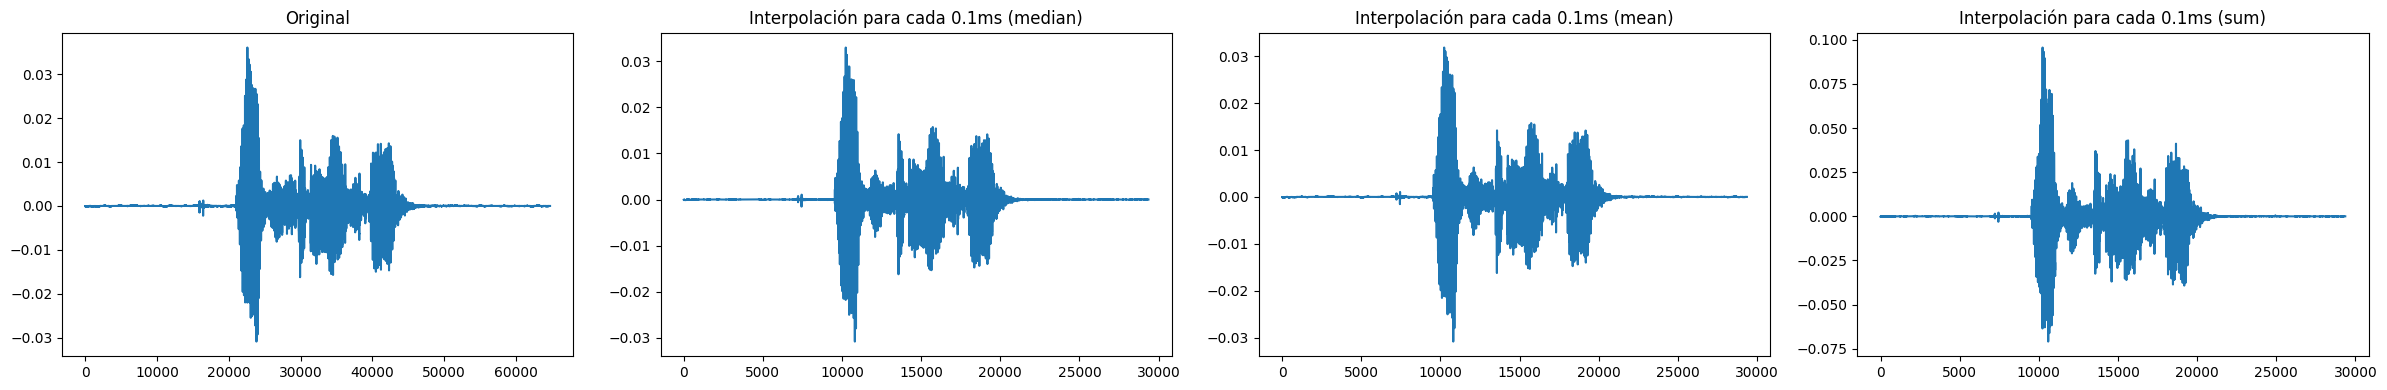

In [23]:
fig = plt.figure(figsize=(24, 4))

plt.subplot(1, 4, 1)
plt.plot(sample1['Audio'].to_numpy())
plt.title('Original')

plt.subplot(1, 4, 2)
plt.plot(resample1.median()['Audio'].to_numpy())
plt.title('Interpolación para cada 0.1ms (median)')

plt.subplot(1, 4, 3)
plt.plot(resample1.mean()['Audio'].to_numpy())
plt.title('Interpolación para cada 0.1ms (mean)')

plt.subplot(1, 4, 4)
plt.plot(resample1.sum()['Audio'].to_numpy())
plt.title('Interpolación para cada 0.1ms (sum)')


fig.tight_layout()
plt.show()

In [18]:
display(Audio(sample1['Audio'], rate=sr),
		Audio(resample1.median()['Audio'], rate=nr1*sr/n1),
		Audio(resample1.mean()['Audio'], rate=nr1*sr/n1),
		Audio(resample1.sum()['Audio'], rate=nr1*sr/n1),
		nr1*sr/n1)

10000.064097613715

In [19]:
np.zeros((nr1, nr1), dtype=np.float32)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)